In [1]:
import numpy as np
import skimage
import utils
import pathlib
import matplotlib.pyplot as plt

In [2]:
def otsu_thresholding(im: np.ndarray) -> int:
    """
        Otsu's thresholding algorithm that segments an image into 1 or 0 (True or False)
        The function takes in a grayscale image and outputs a threshold value

        args:
            im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
        return:
            (int) the computed thresholding value
    """
    assert im.dtype == np.uint8

    # Normalized histogram
    hist = np.histogram(im.flatten(), bins=256, range=(0, 256))[0] / im.size  # One bin per number of possible pixel values
    
    # Cumulative sum
    cum_sum = np.cumsum(hist)

    # Cumulative mean
    cum_mean = np.cumsum(hist * np.arange(256)) 
  
    # Global mean
    global_mean = cum_mean[-1]  # Cumulative mean of i up to k = L-1, which is the last element of cum_mean

    # Between class variance
    sigma_b = (global_mean * cum_sum - cum_mean)**2 / (cum_sum * (1 - cum_sum))
    sigma_b = np.nan_to_num(sigma_b)  # Convert NaNs to 0
    
    # Find the threshold k*
    threshold = np.argmax(sigma_b)
   
    return threshold
    ### END YOUR CODE HERE ### 

In [3]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impaths_to_segment = [
        pathlib.Path("thumbprint.png"),
        pathlib.Path("rice-shaded.png")
    ]
    for impath in impaths_to_segment:
        im = utils.read_image(impath)
        threshold = otsu_thresholding(im)
        print("Found optimal threshold:", threshold)

        # Segment the image by threshold
        segmented_image = (im >= threshold)
        assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
                im.shape, segmented_image.shape)
        assert segmented_image.dtype == bool, "Expected thresholded image dtype to be bool. Was: {}".format(
                segmented_image.dtype)

        segmented_image = utils.to_uint8(segmented_image)

        save_path = "{}-segmented.png".format(impath.stem)
        utils.save_im(save_path, segmented_image)

        


Reading image: images\thumbprint.png
Found optimal threshold: 153
Saving image to: image_processed\thumbprint-segmented.png
Reading image: images\rice-shaded.png
Found optimal threshold: 134
Saving image to: image_processed\rice-shaded-segmented.png


C:\Users\jonas\AppData\Local\Temp\ipykernel_19996\2905056825.py:26: RuntimeWarning: invalid value encountered in divide
  sigma_b = (global_mean * cum_sum - cum_mean)**2 / (cum_sum * (1 - cum_sum))


Reading image: images\rice-shaded.png
Reading image: image_processed\rice-shaded-segmented.png


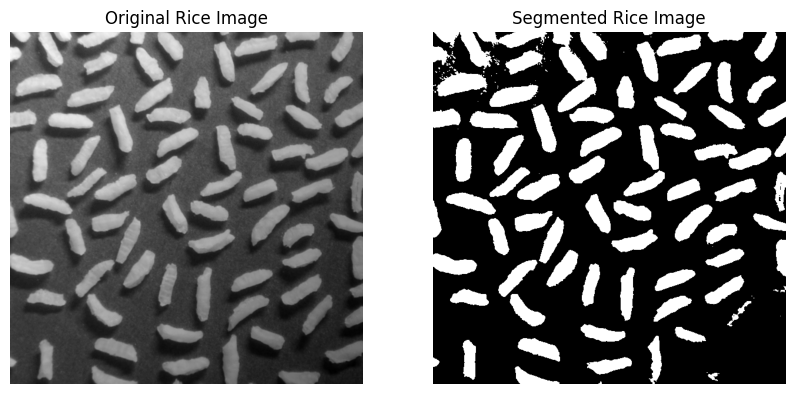

In [4]:
im_rice = utils.read_image("rice-shaded.png", image_folder=pathlib.Path("images"))
im_rice_segmented = utils.read_image("rice-shaded-segmented.png", image_folder=pathlib.Path("image_processed"))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(im_rice, cmap='gray')
axes[0].set_title('Original Rice Image')
axes[0].axis('off')
axes[1].imshow(im_rice_segmented, cmap='gray')
axes[1].set_title('Segmented Rice Image')
axes[1].axis('off')
plt.show()

Reading image: images\thumbprint.png
Reading image: image_processed\thumbprint-segmented.png


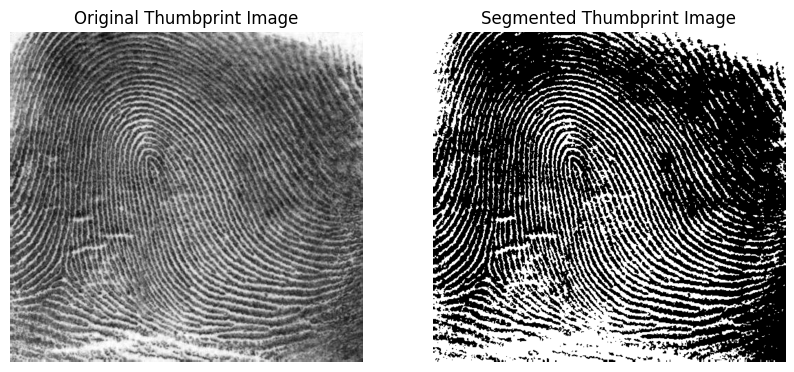

In [5]:
im_thumbprint = utils.read_image("thumbprint.png", image_folder=pathlib.Path("images"))
im_thumbprint_segmented = utils.read_image("thumbprint-segmented.png", image_folder=pathlib.Path("image_processed"))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(im_thumbprint, cmap='gray')
axes[0].set_title('Original Thumbprint Image')
axes[0].axis('off')
axes[1].imshow(im_thumbprint_segmented, cmap='gray')
axes[1].set_title('Segmented Thumbprint Image')
axes[1].axis('off')
plt.show()